In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import ipywidgets
import numpy as np

In [2]:
dep_airports = pd.read_csv('airports.dat', names = ['None','Airport', 'Country','City','Depart Code','Code','Dep Latitude','Dep Longitude','None','None','None', 'None','None','None'])
arr_airports = pd.read_csv('airports.dat', names = ['None','Airport', 'Country','City','Arrive Code','Code','Arr Latitude','Arr Longitude','None','None','None', 'None','None','None'])

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [3]:
dep_airports = dep_airports.loc[:,('Depart Code', 'Dep Latitude', 'Dep Longitude')]
arr_airports = arr_airports.loc[:,('Arrive Code', 'Arr Latitude', 'Arr Longitude')]

In [4]:
flights = pd.read_excel("flights.xlsx")
flights.head()

,Date,Flight No,Actual,Airline,Domestic/Int,Alliance,Country/Region,Departure City,Departure Airport,Depart Code,...,Price,Tax,Manufacturer,Aircraft,Aircraft Code,Reg No,Meal,Bag,Seq,FFP
0,2008.6.28,MU5664,MU5664,China Eastern Airlines,D,ST,China,Xiamen,Xiamen Gaoqi Int'l,XMN,...,NaN,NaN,Boeing,MD-90-30,MD90,NaN,1,NaN,NaN,NaN
1,2009.8.21,9C8839,9C8839,Spring Airlines,D,NaN,China,Shanghai,Shanghai Pudong Int'l,PVG,...,NaN,NaN,Airbus,A320-214,A320,NaN,0,NaN,NaN,NaN
2,2009.8.28,9C8810,9C8810,Spring Airlines,D,NaN,China,Changchun,Changchun Longjia Int'l,CGQ,...,NaN,NaN,Airbus,A320-214,A320,NaN,0,NaN,NaN,NaN
3,2010.2.2,MU515,MU515,China Eastern Airlines,I,ST,China,Shanghai,Shanghai Pudong Int'l,PVG,...,NaN,NaN,Airbus,A300B4-605R,A306,NaN,1,NaN,NaN,NaN
4,2010.2.6,MU518,MU518,China Eastern Airlines,I,ST,China,Fukuoka,Fukuoka Int'l,FUK,...,NaN,NaN,Boeing,737-89PWL,B738,B-5472,1,NaN,NaN,NaN


In [5]:
flight_dep = pd.merge(flights, dep_airports, left_on = 'Depart Code', right_on = 'Depart Code', how = 'left')
flight_airport = pd.merge(flight_dep, arr_airports, left_on = 'Arrive Code', right_on = 'Arrive Code', how = 'left')

In [6]:
flight_airport['Airline_sold'] = flight_airport['Airline']

In [7]:
def replace_airline(old_airline):
    if old_airline == 'United Express':
        return 'United Airlines'
    elif old_airline == 'Delta Connection':
        return 'Delta Air Lines'
    elif old_airline == 'American Eagle':
        return "American Airlines"
    elif old_airline == 'Alaska Horizon':
        return 'Alaska Airlines'
    elif old_airline == 'Air Canada Express':
        return 'Air Canada'
    else:
        return old_airline

In [8]:
for i, row in flight_airport.iterrows():
    temp = row['Airline'].split('\ndba ')
    if  len(temp) == 2:       
        flight_airport.set_value(i, 'Airline_sold', replace_airline(temp[1]))

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [9]:
def aircraft_type_processor(code):
    if code == 'A306':
        return "Airbus A300"
    elif code == 'A319' or code == 'A320' or code == 'A321' or code == 'A21N' or code == 'A20N':
        return "Airbus A320 family"
    elif code == 'A332' or code == 'A333':
        return "Airbus A330"
    elif code == 'A359':
        return "Airbus A350"
    elif code == 'A388':
        return "Airbus A380"
    elif code == 'B738' or code == 'B739' or code == 'B73E' or code == 'B737' or code == 'B38M':
        return "Boeing 737"
    elif code == "B744" or code == 'B748':
        return "Boeing 747"
    elif code == "B752" or code == 'B753':
        return "Boeing 757"
    elif code == 'B763' or code == 'B76W':
        return "Boeing 767"
    elif code == "B772" or code == 'B77L' or code == 'B773' or code == 'B77W':
        return "Boeing 777"
    elif code == "B788" or code == 'B789':
        return "Boeing 787"
    elif code == "MD88" or code == 'MD90' or code == 'B712':
        return "Boeing MD-80/90/717 Series"
    elif code == "E145" or code == 'E170' or code == 'E175' or code == 'E190':
        return "Embraer Regional Jets"
    elif code == "CRJ2" or code == 'CRJ7' or code == 'CRJ9':
        return "Canadair Regional Jets"
    elif code == "DH8D":
        return "Bombardier Dash-8"
    elif code == "AJ27":
        return "Comac ARJ-21"
    elif code == "C402":
        return "Cessna C402"

In [10]:
def aircraft_detail_processor(code):
    if code == 'A306':
        return "Airbus A300-600"
    elif code == 'A319':
        return "Airbus A319-100"
    elif code == 'A320':
        return "Airbus A320-200"
    elif code == 'A321':
        return "Airbus A321-200"
    elif code == 'A21N': 
        return "Airbus A321 NEO"
    elif code == 'A20N':
        return "Airbus A320 NEO"
    elif code == 'A332':
        return "Airbus A330-200"
    elif code == 'A333':
        return "Airbus A330-300"
    elif code == 'A359':
        return "Airbus A350-900"
    elif code == 'A388':
        return "Airbus A380-800"
    elif code == 'B712':
        return "Boeing 717-200"
    elif code == 'B737':
        return "Boeing 737-700"
    elif code == 'B738':
        return "Boeing 737-800"
    elif code == 'B739':
        return "Boeing 737-900"
    elif code == 'B73E':
        return "Boeing 737-900ER"
    elif code == 'B38M':
        return "Boeing 737 MAX 8"
    elif code == "B744":
        return "Boeing 747-400"
    elif code == 'B748':
        return "Boeing 747-8i"
    elif code == "B752":
        return "Boeing 757-200"
    elif code == 'B753':
        return "Boeing 757-300"
    elif code == 'B763':
        return "Boeing 767-300"
    elif code == 'B76W':
        return "Boeing 767-300ER"
    elif code == "B772":
        return "Boeing 777-200"
    elif code == "B77L":
        return "Boeing 777-200ER"
    elif code == 'B773':
        return "Boeing 777-300"
    elif code == 'B77W':
        return "Boeing 777-300ER"
    elif code == "B788":
        return "Boeing 787-8"
    elif code == 'B789':
        return "Boeing 787-9"
    elif code == "MD88":
        return "Boeing MD-88"
    elif code == 'MD90':
        return "Boeing MD-90"
    elif code == "E145":
        return "Embraer ERJ-145"
    elif code == 'E170':
        return "Embraer ERJ-170"
    elif code == 'E175':
        return "Embraer ERJ-175"
    elif code == 'E190':
        return "Embraer ERJ-190"
    elif code == "CRJ2":
        return "Canadair CRJ-200"
    elif code == 'CRJ7':
        return "Canadair CRJ-700"
    elif code == 'CRJ9':
        return "Canadair CRJ-900"
    elif code == "DH8D":
        return "Bombardier Dash-8 Q400"
    elif code == "AJ27":
        return "Comac ARJ-21-700"
    elif code == "C402":
        return "Cessna C402"

In [11]:
flight_airport['Aircraft_type'] = flight_airport['Aircraft Code']
flight_airport['Aircraft_type_detail'] = flight_airport['Aircraft Code']

for i, row in flight_airport.iterrows():
        
    flight_airport.set_value(i, 'Aircraft_type', aircraft_type_processor(row['Aircraft_type']))
    flight_airport.set_value(i, 'Aircraft_type_detail', aircraft_detail_processor(row['Aircraft_type_detail']))


/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


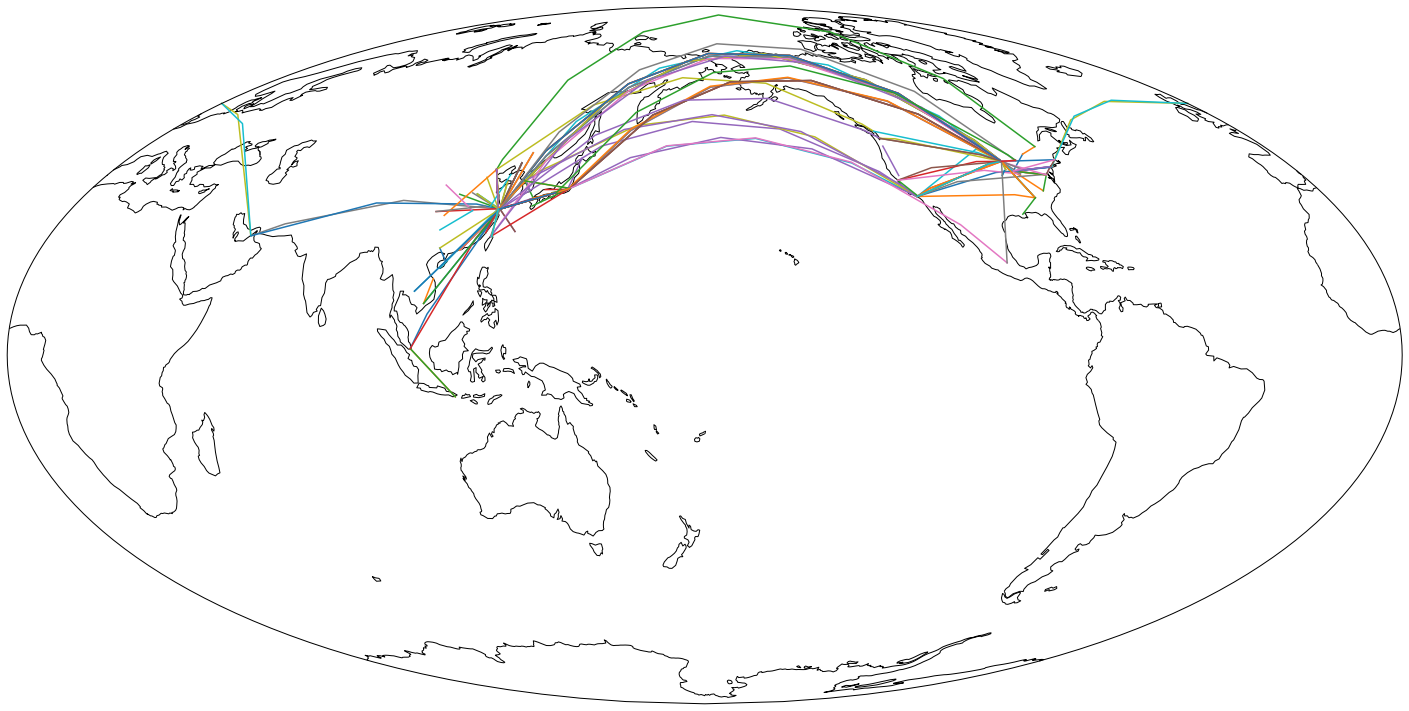

In [26]:
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111, projection = cartopy.crs.Mollweide(central_longitude=180.0))
ax.plot([flight_airport['Dep Longitude'], flight_airport['Arr Longitude']], [flight_airport['Dep Latitude'], flight_airport['Arr Latitude']], transform = cartopy.crs.Geodetic())
ax.set_global()
ax.coastlines()

In [25]:
airline = flight_airport['Airline_sold'].unique().tolist()
airline.sort()
airline.insert(0, "[ShowAll]")

city = pd.concat([flight_airport['Departure City'], flight_airport['Arrival City']]).unique().tolist()
city.sort()
city.insert(0, "[ShowAll]")

aircraft = flight_airport['Aircraft_type'].unique().tolist()
aircraft.sort()
aircraft.insert(0, "[ShowAll]")

@ipywidgets.interact(Airline = airline, City = city, Aircraft = aircraft)

def print_flights(Airline, City, Aircraft):
    df = flight_airport
    if Airline != "[ShowAll]":
        df = df[df['Airline_sold']==Airline].reset_index(drop=True)
    if City != "[ShowAll]":
        df = df[(df['Departure City']==City) | (df['Arrival City']==City)].reset_index(drop=True)
    if Aircraft != "[ShowAll]":
        df = df[df['Aircraft_type']==Aircraft].reset_index(drop=True)
    fig = plt.figure(figsize=(25,25))
    ax = fig.add_subplot(111, projection = cartopy.crs.Mollweide(central_longitude=180.0))

    ax.set_global()
    ax.coastlines()
    ax.plot([df['Dep Longitude'], df['Arr Longitude']], [df['Dep Latitude'], df['Arr Latitude']], transform = cartopy.crs.Geodetic())



interactive(children=(Dropdown(description='Airline', options=('[ShowAll]', 'Aeroméxico', 'Air Busan', 'Air Ca…